#### DACBO Using Deep RL

Goal: Formulating BO as an MDP on which an RL agent can be trained. The state should identify the state and progress of the optimization. Actions could be acquisition function selection, acquisition function hyperparameter tuning, ...

##### Setup

- Environment step $\equiv$ BO step
- Episode $\equiv$ BO run
- Full state feature: See `observation.py` for all observation types
- Single state feature: Only number of passed trials
- Action: Setting HP $\beta$ in the UCB acquisition function, where $\beta\in[0,\infty)$. Specifically, we adjust $\beta$ in a logarithmic search space, i.e. $\beta=10^{b}$, where $b$ can be incremented or decremented by $1$ in each environment step
- Baseline: SMAC3 BlackBoxFacade
- Reward: $\begin{cases}-1 & \text{if incumbent in current episode} \geq \text{incumbent found by SMAC} \\ 1 & \text{otherwise}\end{cases}$
- Episode ends iff reward = 1 or max. BO steps per episode are reached

##### Experiment

- $150 \cdot 128 = 19\, 200$ episodes of length 77 each, i.e. ~1.5M environment steps
- DQN as deep RL algorithm
- BBOB FIDs: 1, 20
- Only trained on seed 1

##### Insights

- Not generalizing too well across seeds (duh, why would it?)
- When evaluated only on seed 1 (the one it was trained on): Very quick progress, almost reaching final performance after 50 % of total budget (FID 1) or 35 % (FID 20) + better final performance than SMAC 
- Conclusion: We are able to learn a policy in a specific setting that can improve optimization performance. BUT: Can we also generalize across seeds or even target functions? Stay tuned

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df

In [2]:
def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    logs = []
    for p in paths:
        fn = Path(p) / "trajectory.parquet"
        if not fn.is_file():
            fn = Path(p) / "runs/logs.csv"
        logs.append(pd.read_csv(fn))

    df = pd.concat(logs).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_csv(Path(p) / "runs/logs_cfg.csv") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

In [3]:
PATH = '/scratch/hpc-prf-intexml/tklenke/experiment_runs/dacboenv_threshold'
NAME = 'dacboenv'

In [4]:
def create_df():
    run_dirs = [(PATH, NAME)]
    dfs = [load_set(paths=[ps], set_id=set_id) for ps, set_id in run_dirs]

    df = pd.concat([d for d, _ in dfs]).reset_index(drop=True)
    df = normalize_logs(df)

    perf = get_interpolated_performance_df(df)

    perf_time = get_interpolated_performance_df(df, x_column="time_norm")

    perf.to_parquet(f'{PATH}/perf.parquet')
    perf_time.to_parquet(f'{PATH}/perf_time.parquet')

In [5]:
create_df()

[10:04:41] INFO     Start normalization...                                                       ]8;id=415563;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=684432;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#602\602]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=625817;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=77809;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#603\603]8;;\

           INFO     Normalize cost...                                                            ]8;id=860387;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=289677;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#605\605]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=270354;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=222394;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#621\621]8;;\

           INFO     Normalize time...                                                            ]8;id=748785;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=508051;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#641\641]8;;\

           INFO     Done.                                                                        ]8;id=341038;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=998645;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#644\644]8;;\

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=362518;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=711843;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#718\718]8;;\
                    budget.                                                                                        

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=981035;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=214584;file:///scratch/hpc-prf-intexml/tklenke/repos/dacboenv/.venv/lib/python3.12/site-packages/carps/analysis/gather_data.py#718\718]8;;\
                    budget.                                                                                        

In [6]:
# Data loading
df = pd.read_parquet(f'{PATH}/perf.parquet')

In [7]:
final = pd.DataFrame(columns=['optimizer_id', 'task_id', 'incumbent_value', 'seed'])

for problem in df['task_id'].unique():
    filtered = df[df['task_id'] == problem]

    incumbents = filtered.groupby(["optimizer_id", "seed"])["trial_value__cost_inc_norm"].min().reset_index()
    incumbents.columns = ['optimizer_id', 'seed', 'incumbent_value']
    incumbents['task_id'] = problem

    final = pd.concat([final, incumbents], ignore_index=True)

final.to_csv(f'{PATH}/final.csv')

/tmp/ipykernel_1090536/2516198194.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final = pd.concat([final, incumbents], ignore_index=True)


In [8]:
final = pd.read_csv(f'{PATH}/final.csv')

In [19]:
FIGURE_PATH = '../figures'

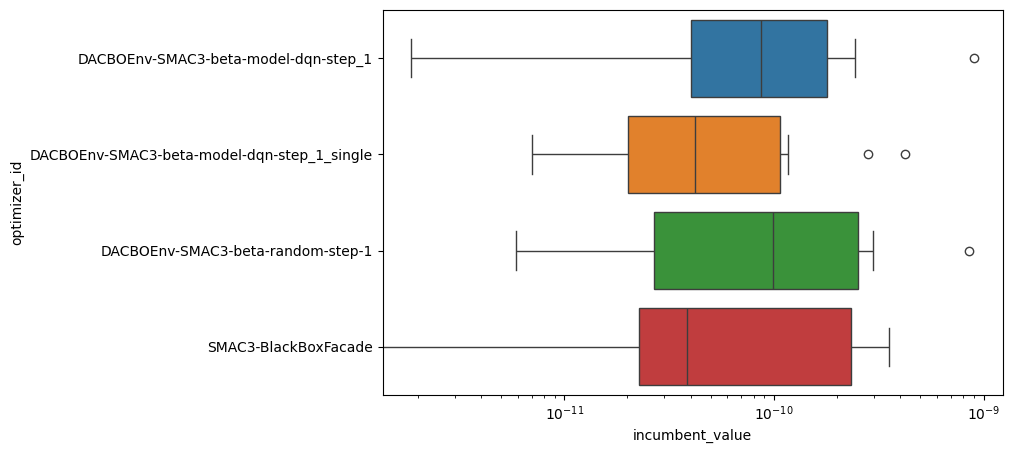

In [ ]:
# Final performance fid 1

plt.figure(figsize=(8, 5))
sns.boxplot(data=final[final["task_id"].str.endswith("/1/0")], x='incumbent_value', y='optimizer_id', hue='optimizer_id')
plt.xscale('log')
#plt.savefig(f'{FIGURE_PATH}/learned_policies/1.pdf', bbox_inches='tight')

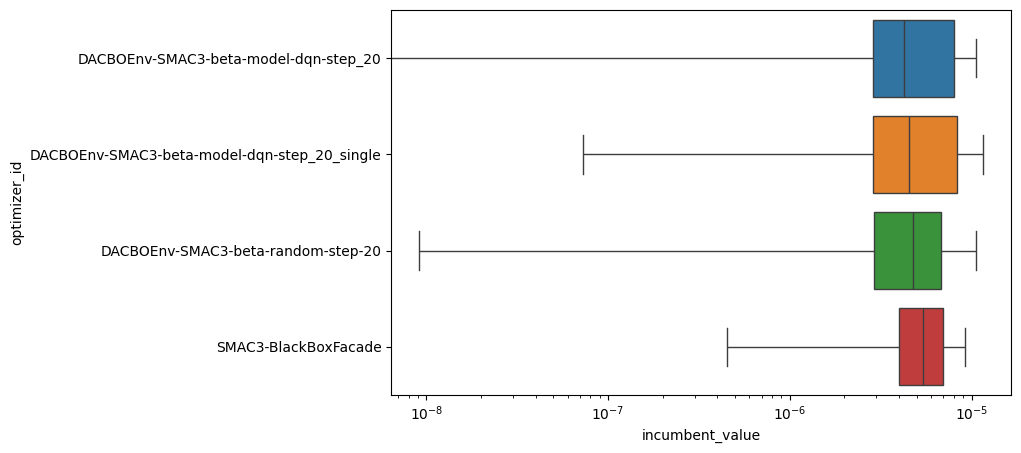

In [ ]:
# Final performance fid 20

plt.figure(figsize=(8, 5))
sns.boxplot(data=final[final["task_id"].str.endswith("/20/0")], x='incumbent_value', y='optimizer_id', hue='optimizer_id')
plt.xscale('log')
#plt.savefig(f'{FIGURE_PATH}/learned_policies/1.pdf', bbox_inches='tight')

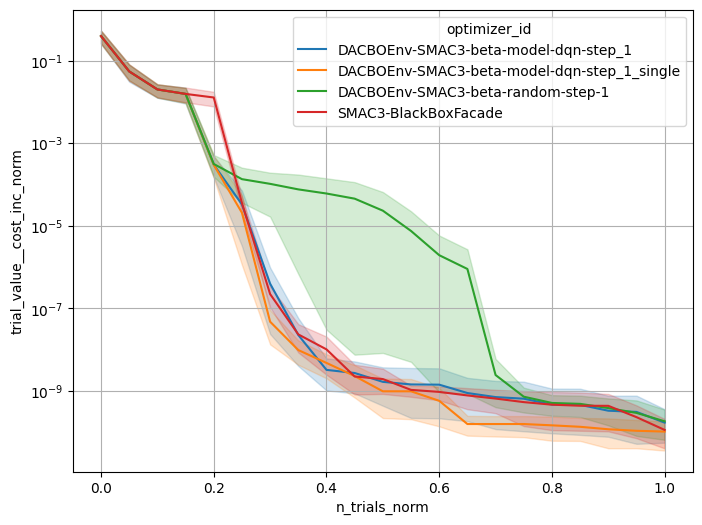

In [ ]:
# Performance over time fid 1, 10 seeds

plt.figure(figsize=(8, 6))
sns.lineplot(data=df[df["task_id"].str.endswith("/1/0")], x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id")
plt.yscale("log")
plt.grid(True)
#plt.savefig(f'{FIGURE_PATH}/learned_policies/2.pdf', bbox_inches='tight')

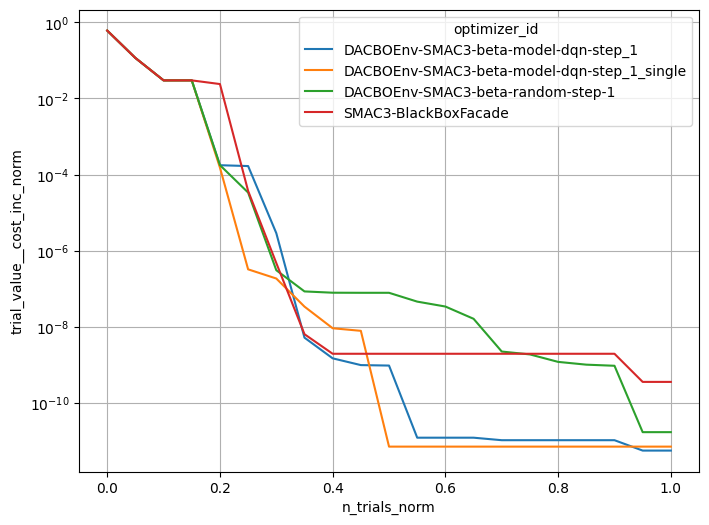

In [ ]:
# Performance over time fid 1, seed 1 only

plt.figure(figsize=(8, 6))
sns.lineplot(data=df[(df["task_id"].str.endswith("/1/0")) & (df["seed"] == 1)], x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id")
plt.yscale("log")
plt.grid(True)

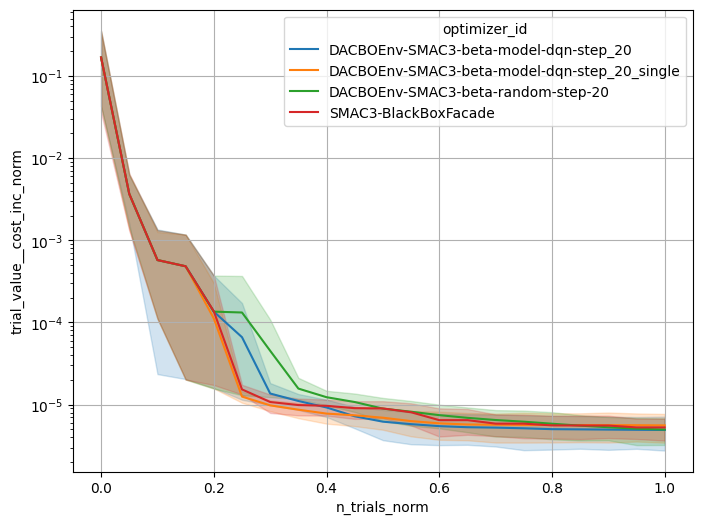

In [ ]:
# Performance over time fid 20, 10 seeds

plt.figure(figsize=(8, 6))
sns.lineplot(data=df[(df["task_id"].str.endswith("/20/0"))], x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id")
plt.yscale("log")
plt.grid(True)

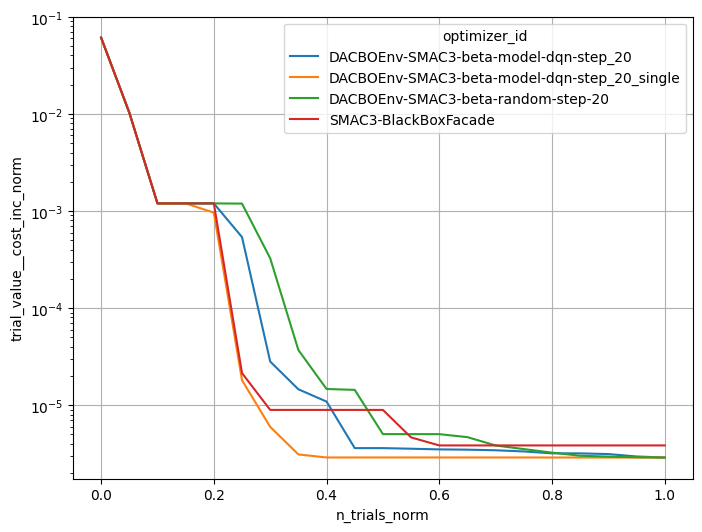

In [16]:
# Performance over time fid 20, seed 1 only

plt.figure(figsize=(8, 6))
sns.lineplot(data=df[(df["task_id"].str.endswith("/20/0")) & (df["seed"] == 1)], x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id")
plt.yscale("log")
plt.grid(True)